In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%time
df = pd.read_csv("C:/Users/matmi/OneDrive/Documents/LANL_Earthquake_Prediction/train.csv/train.csv")

Wall time: 3min 6s


In [3]:
df.shape

(629145480, 2)

In [4]:
pd.set_option("display.precision", 24)
df.head(10)

,acoustic_data,time_to_failure
0,12,1.469099983200000014704756
1,6,1.469099982099999923690348
2,8,1.469099981000000054720545
3,5,1.469099979899999963706136
4,8,1.469099978800000094736333
5,8,1.469099977700000003721925
6,9,1.469099976599999912707517
7,7,1.469099975500000043737714
8,-5,1.469099974399999952723306
9,3,1.469099973300000083753503


In [5]:
%%time
df.describe()

Wall time: 3min 30s


,acoustic_data,time_to_failure
count,6.291454800000000000000000e+08,6.291454800000000000000000e+08
mean,4.519467573700124418678570e+00,5.678291712978240646236827e+00
std,1.073570724850370794456467e+01,3.672696519446868812508455e+00
min,-5.515000000000000000000000e+03,9.550396316599999693621598e-05
25%,2.000000000000000000000000e+00,2.625996996050000031885929e+00
50%,5.000000000000000000000000e+00,5.349797741249999738499810e+00
75%,7.000000000000000000000000e+00,8.173395507775000012884448e+00
max,5.444000000000000000000000e+03,1.610739999999999838564690e+01


In [6]:
%%time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int64  
 1   time_to_failure  float64
dtypes: float64(1), int64(1)
memory usage: 9.4 GB
Wall time: 92.7 ms


In [19]:
# .values[::100] changes the df column to a numpy array, but not sure the use of [::100]
train_acoustic_arr = df['acoustic_data'].values[::100]
time_to_failure_arr = df['time_to_failure'].values[::100]

In [8]:
%%time
df.isnull().sum()

Wall time: 24.3 s


acoustic_data      0
time_to_failure    0
dtype: int64

In [9]:
%%time
len(df)/150000

Wall time: 0 ns


4194.3032

In [10]:
%%time
df.iloc[1]

Wall time: 1e+03 µs


acoustic_data      6.000000000000000000000000
time_to_failure    1.469099982099999923690348
Name: 1, dtype: float64

In [11]:
%%time
for i in range(5):
    print(df.time_to_failure.values[i])

1.4690999832
1.4690999821
1.469099981
1.4690999799
1.4690999788
Wall time: 2 ms


In [12]:
%%time
df.iloc[621985672:621985674]

Wall time: 1 ms


,acoustic_data,time_to_failure
621985672,10,0.000595512439299999995525
621985673,2,11.618600019000000500568603


# Calculate the rolling difference of the time to failure to identify the step increases in value (delta_ttf>0), which indicate an experimental earthquake. Based on the 

In [13]:
%%time
df_diff = df.time_to_failure.diff()
df_diff.head(10)


Wall time: 2.81 s


0                           NaN
1   -0.000000001100000091014408
2   -0.000000001099999868969803
3   -0.000000001100000091014408
4   -0.000000001099999868969803
5   -0.000000001100000091014408
6   -0.000000001100000091014408
7   -0.000000001099999868969803
8   -0.000000001100000091014408
9   -0.000000001099999868969803
Name: time_to_failure, dtype: float64

In [14]:
len(df_diff)

629145480

In [15]:
quake_ind = df_diff.loc[df_diff > 0]

In [16]:
quake_ind

5656574      11.540004507177050285804398
50085878     14.179904507825289883271580
104677356     8.855904506336079506922943
138772453    12.692904507131899549676746
187641820     8.054904506145900811020510
218652630     7.057904505904599723464798
245829585    16.106904507467007192644814
307838917     7.904904506085149940020074
338276287     9.636904506474079923350473
375377848    11.425904506611239241919975
419368880    11.024004506283079152240134
461811623     8.828004506336833756563465
495800225     8.565904506238307902776796
528777115    14.750904507492730743933862
585568144     9.458904506387009192280857
621985673    11.618004506560700050954438
Name: time_to_failure, dtype: float64

In [17]:
len(quake_ind)

16

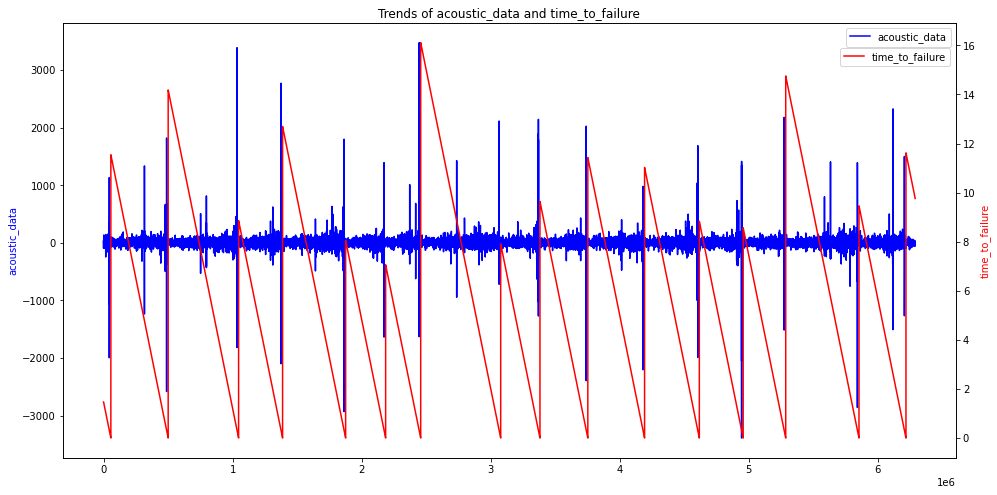

In [29]:
fig, ax1 = plt.subplots(figsize=(16,8))
plt.title("Trends of acoustic_data and time_to_failure")
plt.plot(train_acoustic_arr, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2=ax1.twinx()
plt.plot(time_to_failure_arr, color='r')
ax2.set_ylabel('time_to_failure', color='r')
plt.legend(['time_to_failure'], loc=(0.87,0.9))
plt.grid(False)


In [ ]:
window_sizes = [14, 28, 56, 112, 224, 448, 896]
for wind in window_sizes:
    df['sm_avg_ser' + str(wind)] = df['acoustic_data'].rolling(window=wind).mean()
    df['sm_std_ser' + str(wind)] = df['time_to_failure'].rolling(window=wind).std()

In [ ]:
plt.plot(df['sm_avg_ser'])

In [ ]:
df['rolling_q25'] = df['acoustic_data'].rolling(window=56).quantile(25)
df['rolling_q50'] 
df['rolling_q75']
df['rolling_iqr']
df['rolling_min']
df['rolling_max']
df['rolling_kurtosis']
df['rolling_skew']